## Deeplab

Rete usata per distinguere le persone da background dell'immagine.
Per poi usare delle immagini reali applicate al nostro task, di virtual try-on.

## 1. Risultato con la maschera binaria, andando a trovare solo la classe persona rispetto allo sfondo

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

import torch
from torchvision.models.segmentation import deeplabv3_resnet101
from torchvision import transforms

In [2]:
def make_deeplab(device):
    deeplab = deeplabv3_resnet101(pretrained=True).to(device)
    deeplab.eval()
    return deeplab
  
def apply_deeplab(deeplab, img, device):

  input_tensor = deeplab_preprocess(img)
  input_batch = input_tensor.unsqueeze(0)
  with torch.no_grad():
      output = deeplab(input_batch.to(device))['out'][0]
  output_predictions = output.argmax(0).cpu().numpy()

  print('n classi',output.shape)
  return (output_predictions == 15) # valore pixel per la persona

In [3]:
deeplab_preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [4]:
device = torch.device("cpu")
deeplab = make_deeplab(device)

In [ ]:
percorso= '/content/persona 1.jpg'

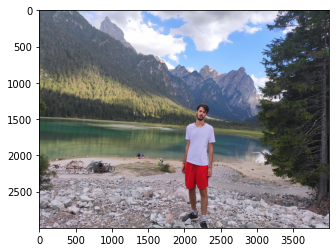

In [5]:
f_name = "/content/1623825477538.jpg"
img_orig = cv2.imread(f_name, 1)
plt.imshow(img_orig[:, :, ::-1])
plt.show()

### Stabilire che aspect_ratio usare

In [6]:
img_orig.shape

(3000, 4000, 3)

In [7]:
# da non fare, per avere sempre stesse dimensioni
k = min(1.0, 1024/max(img_orig.shape[1], img_orig.shape[0]))
img = cv2.resize(img_orig, None, fx=k, fy=k, interpolation=cv2.INTER_LANCZOS4)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


n classi torch.Size([21, 768, 1024])


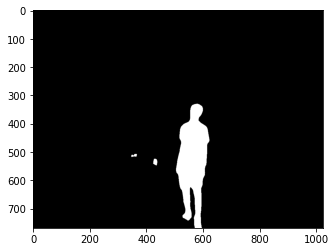

In [7]:
img = cv2.resize(img_orig, (1024, 768), interpolation=cv2.INTER_LANCZOS4)
mask = apply_deeplab(deeplab, img, device)

plt.imshow(mask, cmap="gray") # rgb
plt.show()

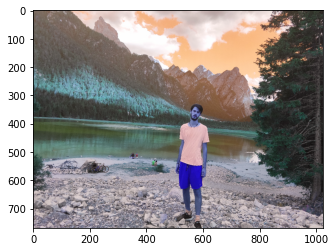

In [8]:
plt.imshow(img) # rgb

In [9]:
# varia dimensione delle immagini, che vengono adoperate

print(img.shape)
print(mask.shape)  
print(img_orig.shape)

(768, 1024, 3)
(768, 1024)
(3000, 4000, 3)


In [ ]:
768, 1024, 3

array([False,  True])

## 2. Estrazione delle maschere con 21 classi, colori diversi nel grafico; anche per altre classi

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model = torch.hub.load('pytorch/vision:v0.9.0', 'deeplabv3_resnet101', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.9.0.zip" to /root/.cache/torch/hub/v0.9.0.zip


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
percorso= '/content/1623825477538.jpg'

In [ ]:
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

## Problema con formato delle immagini, PIL

- PIL apre immagini con 4 canali a volte, che poi non sono ammesse dal pre-processing; lento perchè lavora con immagini di grandi dimensioni
- cv2.imread: quando faccio grafico con colori diversi per ogni classe ha gli oggetti non iterabili

In [ ]:
# utilizzando PIL
input_image= Image.open(percorso)
input_image
print(input_image.size())

image= np.array(input_image)
#image.shape

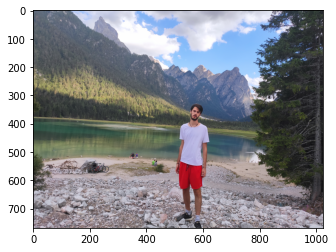

In [ ]:
# RESIZE delle immagini aperte con PIL

#W, H
size= (1024, 768) # da invertiere le dimensioni {1}
im = Image.open(percorso)
im.thumbnail(size, Image.ANTIALIAS)
plt.imshow(im)

In [ ]:
im=np.array(im)
im.shape

(768, 1024, 3)

oppure

In [ ]:
# utilizzando opencv per leggere l'immagine
import cv2
quattro_canali= '/content/1623825437448.jpg'

input_image= cv2.imread(quattro_canali, 1)
print('prima:', input_image.shape)

# resize dell'immagine, se aperta con opencv
k = min(1.0, 1024/max(input_image.shape[0], input_image.shape[1]))
input_image = cv2.resize(input_image, None, fx=k, fy=k, interpolation=cv2.INTER_LANCZOS4)
print('dopo:', input_image.shape)

prima: (4000, 3000, 3)
dopo: (1024, 768, 3)


Se l'apro con opencv posso fare il resize, per esssere più veloce nella valutazione, ma poi non posso iterare sull'immagine.

Se faccio con PIL non posso fare il resize (al momento), ma posso iterare sull'immagine.

In [ ]:
# pre-processing e batch generation

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

In [ ]:
with torch.no_grad():
    output = model(input_batch)['out'][0] # con 21 classi
output_predictions = output.argmax(0)

In [ ]:
# dimensione del 1° canale, rispetto alle 21 classi
output.shape

torch.Size([21, 3000, 4000])

In [ ]:
output[:,0,0]

tensor([ 8.9683, -0.3108, -1.5966, -0.1587, -0.1570, -2.0923, -0.4091, -0.4733,
        -1.3099, -0.3601, -0.7472,  0.1777, -0.8874, -0.7546, -0.9344,  1.9970,
        -0.2812, -0.5597, -0.6026, -0.0708,  0.2582])

In [ ]:
np.unique(output_predictions==15)

array([False,  True])

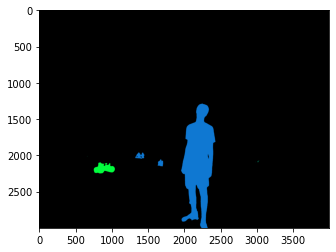

In [ ]:
# color palette for each class

palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size) # output
r.putpalette(colors)

plt.imshow(r)


## 3. Creare immagine a colori come nel dataset

Individuare la posizione della persona e fare lo sfondo bianco e aspect_ratio dell'immagine come le immagini presenti nel dataset.

Portare imagine al centro e con giuste trasformazioni.

In modo tale da poter applicare anche qua le tecniche sviluppate per il dataset

Selezionare in base al FORMATO, per non deformare l'immagine

In [14]:
mask= mask.reshape((768,1024,1))

In [10]:
# oppure, ma non funziona con tutti i formati 
'''
Dipende da che aspect_ratio impostato quando faccio il resize dell'immagine prima di applicare deeplab
'''
mask= mask.reshape((1024,768,1))
# problemi con (1024, 768) del dataset

In [15]:
new= img*mask
print(new.shape)
print(type(new))

#plt.imshow(new)

(768, 1024, 3)
<class 'numpy.ndarray'>


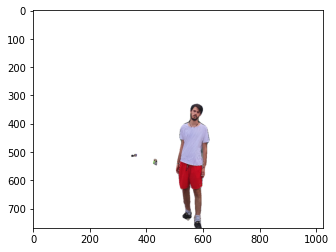

In [16]:
tic= np.where(new==0, 255, new) # condizione vera e falsa

# plot con colori giusti
plt.imshow(tic[:, :, ::-1])
#plt.imshow(tic)

In [ ]:
type(tic)

numpy.ndarray

In [ ]:
tic.shape

(768, 1024, 3)

# Prendo la maschera estratta direttamente da 'deeplab' e centro l'immagine come nel dataset

In modo automatico, centrato sulla persona

2 indice da usare


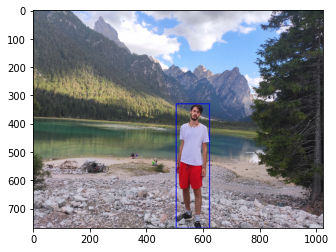

In [17]:
# impllemento tutto insieme
# N.B. mi serve le DIMENSIONI del bbox    pos[c]

mask= np.array(mask, dtype=np.uint8)
pos = [] 
coun, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # with dtype=uint8

for c in coun:
  x, y, w, h = cv2.boundingRect(c)
  pos.append([x, y, w, h])

# if sulla len(pos)
if len(pos) >1:
  m=0
  for i in range(len(pos)):
    if pos[i][3] >m:
      c=i
      m= pos[i][3]

  print(c, 'indice da usare') # da trovare indice del max, per considerare solo quello

  dress1 = cv2.rectangle(img, (pos[c][0], pos[c][1]), (pos[c][0]+pos[c][2], pos[c][1]+pos[c][3]), (255, 0, 0), 2)
  # (x + w, y + h)
  plt.imshow(dress1[:, :, ::-1])
else:
  print('Unica persona individuata')
  c=0

In [18]:
# ordinarla rispetto l'ultimo valore  (x,y)
pos

[[424, 524, 15, 24], [347, 507, 20, 11], [505, 330, 118, 438]]

In [19]:
pos[2]

[505, 330, 118, 438]

In [ ]:
len(pos)

3

In [20]:
y_1= pos[c][1]
y_2= pos[c][1]+pos[c][3] + 40

# posso avere margini per allargare le dimensioni   [-100/+100]
x_1= pos[c][0] - 40
x_2= pos[c][0]+pos[c][2] + 40

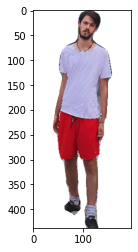

In [21]:
final= tic[y_1:y_2, x_1:x_2, ::] # y,x
final.shape
plt.imshow(final[:,:,::-1])

In [ ]:
cv2.imwrite("output_1_automatico.jpg", final)

True

Parte ok, ma manuale

In [22]:
# devo centrare la posizione della persona, con bounding box 
# per rendere l'immagine come quelle che provengono dal dataeet Yoox

end= tic[250::, 400:800, ::] # y,x

<class 'numpy.ndarray'>
(518, 400, 3)


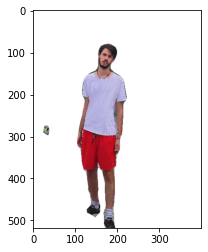

In [23]:
print(type(end))
print(end.shape)
plt.imshow(end[:, :, ::-1])

Il resize delle dimensioni viene fatto nella parte Semantica

FINE

In [ ]:
def crop_center(img,cropx,cropy):
    y,x,c = img.shape
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2    
    return img[starty:starty+cropy, startx:startx+cropx, :]
    
v= crop_center(tic, 10, 10)
v.shape

In [ ]:
#@title Per salvare l'immagine e scaricarla
cv2.imwrite("filename.png", img)
# o
 plt.imsave('file name with extension(like .jpg)', numpy_array)
 # o
from PIL import Image
image = Image.fromarray(numpy_array)
image.save('file name with extension(like .jpg)')